# 문서 유사도 - 코사인 유사도

In [1]:
import numpy as np
import matplotlib.pyplot as plt

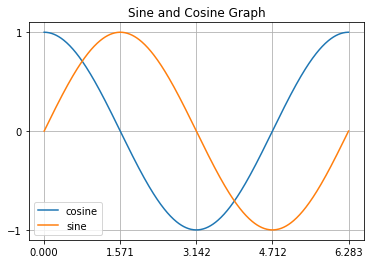

In [6]:
xs = np.linspace(0, 2*np.pi, 500)
cosx = np.cos(xs)
sinx = np.sin(xs)

plt.plot(xs, cosx, label='cosine')
plt.plot(xs, sinx, label='sine')
plt.yticks([-1, 0, 1])
plt.xticks([0, np.pi/2, np.pi, 1.5*np.pi, 2*np.pi])
plt.grid()
plt.title('Sine and Cosine Graph')
plt.legend()
plt.show()

In [14]:
v1, v2, v3 = np.array([1,0]), np.array([0,1]), np.array([-1,0])
v1_norm = np.sqrt(sum(np.square(v1)))
v2_norm = np.sqrt(sum(np.square(v2)))
v3_norm = np.sqrt(sum(np.square(v3)))

In [15]:
np.dot(v1, v2) / (v1_norm * v2_norm), np.dot(v1, v3) / (v1_norm * v3_norm)

(0.0, -1.0)

In [16]:
def cos_similarity(v1, v2):
    v1_norm = np.sqrt(sum(np.square(v1)))
    v2_norm = np.sqrt(sum(np.square(v2)))
    return np.dot(v1, v2) / (v1_norm * v2_norm)

In [20]:
cos_similarity(np.array([1,0]), np.array([1, 1]))

0.7071067811865475

* 문장의 코사인 유사도

In [21]:
doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer()
feature_cv = cvect.fit_transform(doc_list)
feature_cv.toarray()

array([[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2],
       [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2]],
      dtype=int64)

In [36]:
f1 = feature_cv.toarray()[0]
f2 = feature_cv.toarray()[1]
f3 = feature_cv.toarray()[2]

In [37]:
print(f'문장1 vs 문장2: {cos_similarity(f1,f2):.4f}')
print(f'문장1 vs 문장3: {cos_similarity(f1,f3):.4f}')
print(f'문장2 vs 문장2: {cos_similarity(f2,f3):.4f}')

문장1 vs 문장2: 0.6093
문장1 vs 문장3: 0.6396
문장2 vs 문장2: 0.6804


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()
feature_tv = tvect.fit_transform(doc_list)
feature_tv.toarray()

array([[0.4155636 , 0.        , 0.4155636 , 0.        , 0.        ,
        0.        , 0.24543856, 0.        , 0.24543856, 0.        ,
        0.        , 0.        , 0.        , 0.4155636 , 0.24543856,
        0.49087711, 0.        , 0.24543856],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.23402865, 0.39624495, 0.23402865, 0.        ,
        0.3013545 , 0.        , 0.39624495, 0.        , 0.23402865,
        0.23402865, 0.39624495, 0.4680573 ],
       [0.        , 0.30985601, 0.        , 0.30985601, 0.30985601,
        0.30985601, 0.18300595, 0.        , 0.18300595, 0.30985601,
        0.23565348, 0.30985601, 0.        , 0.        , 0.18300595,
        0.3660119 , 0.        , 0.3660119 ]])

In [44]:
f1 = feature_tv.toarray()[0]
f2 = feature_tv.toarray()[1]
f3 = feature_tv.toarray()[2]
print(f'문장1 vs 문장2: {cos_similarity(f1,f2):.4f}')
print(f'문장1 vs 문장3: {cos_similarity(f1,f3):.4f}')
print(f'문장2 vs 문장2: {cos_similarity(f2,f3):.4f}')

문장1 vs 문장2: 0.4021
문장1 vs 문장3: 0.4043
문장2 vs 문장2: 0.4565


* Scikit-Learn 코사인 유사도

In [47]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(feature_tv, feature_tv)

array([[1.        , 0.40207758, 0.40425045],
       [0.40207758, 1.        , 0.45647296],
       [0.40425045, 0.45647296, 1.        ]])

### Opinion Review 데이터셋의 문서 유사도

In [48]:
import pandas as pd
import glob, os

path = 'OpinosisDataset1.0/topics'
os.path.join(path, '*.data') # Windows - \\, Mac - /

'OpinosisDataset1.0/topics\\*.data'

In [50]:
filename_list = []
opinion_text = []
for file in glob.glob(os.path.join(path, '*.data')):
    with open(file, encoding='latin1') as f:
        text = f.read()
    opinion_text.append(text)
    filename = file.split('\\')[-1].split('.')[0]
    filename_list.append(filename)
# print(filename_list)

df = pd.DataFrame({'filename':filename_list, 'opinion':opinion_text})
df.head(3)

,filename,opinion
0,accuracy_garmin_nuvi_255W_gps,", and is very, very accurate .\n but for the m..."
1,bathroom_bestwestern_hotel_sfo,"The room was not overly big, but clean and ve..."
2,battery-life_amazon_kindle,After I plugged it in to my USB hub on my com...


In [51]:
from nltk import word_tokenize

def simple_tokenizer(text):     # 글자수가 2개 이하인 토큰은 제거
    return [word for word in word_tokenize(text) if len(word) > 2]

In [54]:
tvect = TfidfVectorizer(tokenizer=simple_tokenizer, stop_words='english',
                        ngram_range=(1, 2), min_df=0.05, max_df=0.85)
feature = tvect.fit_transform(df.opinion)

In [56]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=10000, random_state=2022)
kmeans.fit(feature)
df['cluster_label'] = kmeans.labels_
df.cluster_label.value_counts()

0    25
1    16
2    10
Name: cluster_label, dtype: int64

In [57]:
# Cluster 1: 호텔
hotel_indices = df[df.cluster_label == 1].index
hotel_indices

Int64Index([1, 13, 14, 15, 20, 21, 24, 28, 30, 31, 32, 38, 39, 40, 45, 46], dtype='int64')

In [60]:
# 호텔로 클러스링된 데이터 중 첫번째 문서
comparison_docname = df.iloc[hotel_indices[0]]['filename']
comparison_docname

'bathroom_bestwestern_hotel_sfo'

In [66]:
# 호텔로 군집화된 데이터 중에서 코사인 유사도 계산
similarity_pair = cosine_similarity(feature[hotel_indices[0]], feature[hotel_indices])
similarity_pair

array([[1.        , 0.03950499, 0.05053449, 0.06150525, 0.05685307,
        0.05599072, 0.0320052 , 0.10782179, 0.24817652, 0.19257054,
        0.48108337, 0.1056082 , 0.13093222, 0.12852642, 0.08746969,
        0.06831609]])

In [68]:
df.iloc[hotel_indices[10]]['filename']

'room_holiday_inn_london'

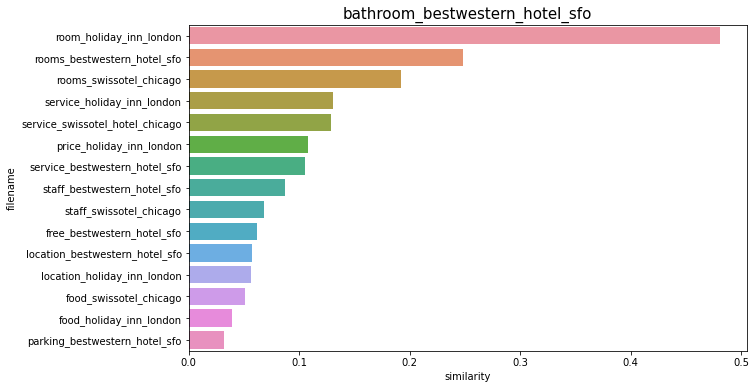

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 반환하되 자기 자신은 제외. 
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indices를 추출하여 재 정렬. 
hotel_sorted_indexes = hotel_indices[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

plt.figure(figsize=(10,6))
sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname, fontsize=15)
plt.show()
